In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('Label')
    plt.xlabel('Prediction')

In [3]:
defaults=pd.read_csv("../datasets/defaults.csv")
# eeg=pd.read_csv("./datasets/eeg.csv")
# generated=pd.read_csv("./datasets/generated.csv")
# vehicles=pd.read_csv("./datasets/vehicles.csv")
# winequality=pd.read_csv("./datasets/winequality.csv")

In [4]:
defaults

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
y=defaults["defaulted"]
x=defaults.drop(["defaulted","id",],axis=1)

In [6]:
x.describe()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [7]:
x.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
from sklearn import preprocessing

temp =x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
x_norm = pd.DataFrame(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
x_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,hidden_layer_sizes=(100,50,10),tol=10e-20, random_state=1,verbose=True,max_iter=1000,warm_start=True,batch_size=512)

In [13]:
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=512, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=1e-19, validation_fraction=0.1, verbose=True,
       warm_start=True)

In [14]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))

Test Accuracy  0.8113333333333334
Train Accuracy  0.8293703703703704


0.45366795366795365

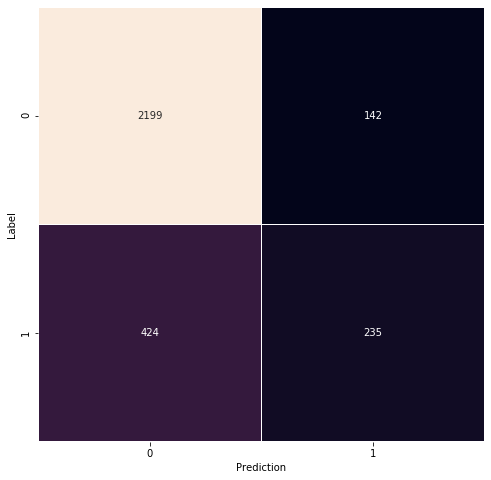

In [15]:
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [16]:
from sklearn.svm import SVC 
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [17]:
clf=SVC(kernel='rbf')

In [18]:
clf.fit(x_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Test Accuracy  0.775
Train Accuracy  0.7846296296296297


0.08660351826792964

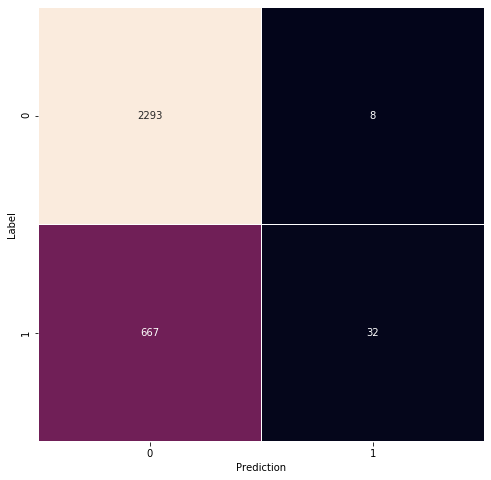

In [19]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [20]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(alpha=0.01,loss="log",verbose=1,max_iter=100)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.1)

In [22]:
clf.fit(x_train,y_train)

-- Epoch 1
Norm: 1.55, NNZs: 23, Bias: -1.635682, T: 27000, Avg. loss: 0.495855
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.56, NNZs: 23, Bias: -1.622954, T: 54000, Avg. loss: 0.492782
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.55, NNZs: 23, Bias: -1.641542, T: 81000, Avg. loss: 0.492618
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.55, NNZs: 23, Bias: -1.632075, T: 108000, Avg. loss: 0.492498
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 23, Bias: -1.636950, T: 135000, Avg. loss: 0.492580
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.55, NNZs: 23, Bias: -1.637696, T: 162000, Avg. loss: 0.492424
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.55, NNZs: 23, Bias: -1.638312, T: 189000, Avg. loss: 0.492481
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.55, NNZs: 23, Bias: -1.636096, T: 216000, Avg. loss: 0.492466
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.55, NNZs: 23, Bias: -1.635201, T: 243000, Avg. loss: 0.4

Norm: 1.55, NNZs: 23, Bias: -1.635146, T: 2214000, Avg. loss: 0.492389
Total training time: 0.41 seconds.
-- Epoch 83
Norm: 1.55, NNZs: 23, Bias: -1.635029, T: 2241000, Avg. loss: 0.492396
Total training time: 0.41 seconds.
-- Epoch 84
Norm: 1.55, NNZs: 23, Bias: -1.634889, T: 2268000, Avg. loss: 0.492396
Total training time: 0.42 seconds.
-- Epoch 85
Norm: 1.55, NNZs: 23, Bias: -1.635131, T: 2295000, Avg. loss: 0.492394
Total training time: 0.42 seconds.
-- Epoch 86
Norm: 1.55, NNZs: 23, Bias: -1.635235, T: 2322000, Avg. loss: 0.492391
Total training time: 0.43 seconds.
-- Epoch 87
Norm: 1.55, NNZs: 23, Bias: -1.635560, T: 2349000, Avg. loss: 0.492390
Total training time: 0.43 seconds.
-- Epoch 88
Norm: 1.55, NNZs: 23, Bias: -1.635455, T: 2376000, Avg. loss: 0.492393
Total training time: 0.43 seconds.
-- Epoch 89
Norm: 1.55, NNZs: 23, Bias: -1.635553, T: 2403000, Avg. loss: 0.492391
Total training time: 0.44 seconds.
-- Epoch 90
Norm: 1.55, NNZs: 23, Bias: -1.635587, T: 2430000, Avg. 

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

Test Accuracy  0.775
Train Accuracy  0.781074074074074


0.023154848046309698

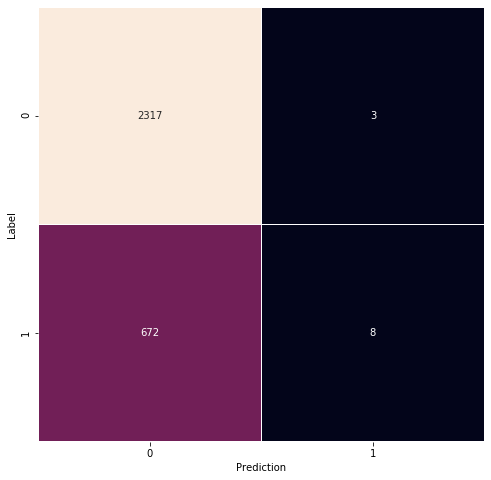

In [23]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [24]:
from sklearn.neighbors import NearestCentroid

In [25]:
clf=NearestCentroid()

In [26]:
clf.fit(x_train,y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

Test Accuracy  0.632
Train Accuracy  0.6578518518518518


0.42016806722689076

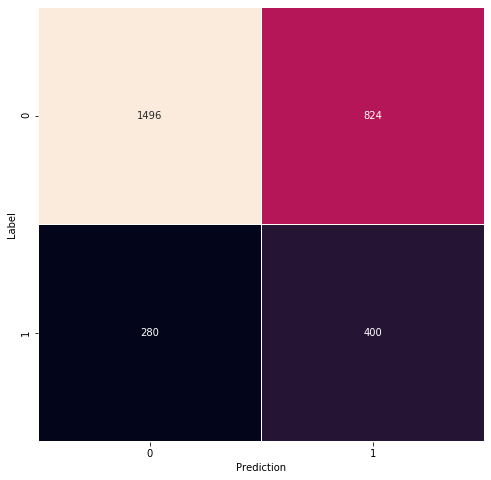

In [27]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()          

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)

In [30]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Test Accuracy  0.7163333333333334
Train Accuracy  0.9993333333333333


0.3837798696596669

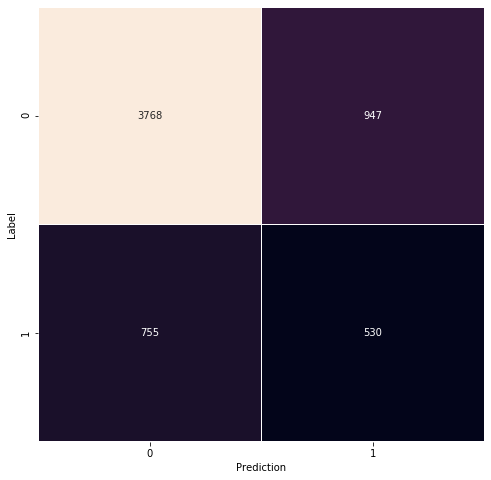

In [31]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

In [32]:
!pip install xgboost

In [33]:
from xgboost import XGBClassifier 

/home/daniyal/.local/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'


In [35]:
clf=XGBClassifier()

In [36]:
clf.fit(x_train, y_train,eval_set=[(x_train, y_train), (x_test, y_test)],eval_metric='logloss',verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-logloss:0.57416	validation_1-logloss:0.57431
[1]	validation_0-logloss:0.51008	validation_1-logloss:0.51145
[2]	validation_0-logloss:0.47196	validation_1-logloss:0.47562
[3]	validation_0-logloss:0.44834	validation_1-logloss:0.45431
[4]	validation_0-logloss:0.43337	validation_1-logloss:0.44149
[5]	validation_0-logloss:0.42275	validation_1-logloss:0.43331
[6]	validation_0-logloss:0.41474	validation_1-logloss:0.42861
[7]	validation_0-logloss:0.40938	validation_1-logloss:0.42560
[8]	validation_0-logloss:0.40530	validation_1-logloss:0.42409
[9]	validation_0-logloss:0.40205	validation_1-logloss:0.42285
[10]	validation_0-logloss:0.39825	validation_1-logloss:0.42200
[11]	validation_0-logloss:0.39619	validation_1-logloss:0.42117
[12]	validation_0-logloss:0.39432	validation_1-logloss:0.42092
[13]	validation_0-logloss:0.39171	validation_1-logloss:0.42082
[14]	validation_0-logloss:0.38946	validation_1-logloss:0.42121
[15]	validation_0-logloss:0.38856	validation_1-logloss:0.42129
[1

Test Accuracy  0.8236666666666667
Train Accuracy  0.8819166666666667


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

0.4803536345776031

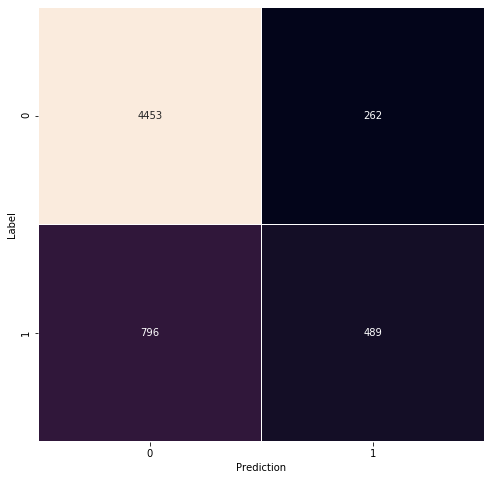

In [37]:
print("Test Accuracy ",clf.score(x_test,y_test))
print("Train Accuracy ",clf.score(x_train,y_train))
plot_confusion_matrix(y_test,clf.predict(x_test))
f1_score(y_test,clf.predict(x_test))

Test Accuracy  0.8748333333333334
Train Accuracy  0.8584583333333333


/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/daniyal/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.4803536345776031

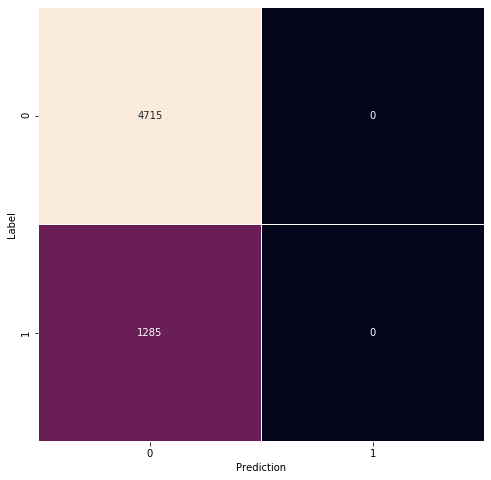

In [38]:
# Testing with a ALWAYS FALSE to check bias in data set 
print("Test Accuracy ",clf.score(x_test,[0 for _ in range(y_test.shape[0]) ]))
print("Train Accuracy ",clf.score(x_train,[0 for _ in range(y_train.shape[0]) ]))
plot_confusion_matrix(y_test,[0 for _ in range(y_test.shape[0]) ])
f1_score(y_test,clf.predict(x_test))